# Analiza oglasov za delo

V tej nalogi analiziram oglase za študenska dela objevljene na: studentski-servis.com

In [110]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import random

In [111]:
dela = pd.read_csv("podatki.csv\podatki.csv", index_col = "št_oglasa")

In [112]:
dela

,delo,lokacija,plača_neto[€/h],plača_bruto[€/h],opis,prosta_mesta,trajanje,delovnik,začetek_dela
št_oglasa,,,,,,,,,
436112,PREDAVANJE,PO SLOVENIJI,8.0,9.3,Iščejo dva predavatelja pri izvedbah programa ...,2,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024
436111,STREŽBA,LJUBLJANA,8.0,9.3,"V mesecu septembru potrebujejo nekoga, ki ima ...",1,POČITNIŠKO DELO,PO DOGOVORU,27. 8. 2024
436110,ČIŠČENJE POSLOVNIH PROSTOROV,KIDRIČEVO,7.7,8.95,V podjetju potrebujejo polnoletno in zanesljiv...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),POPOLDAN,30. 9. 2024
436108,PREVOZI Z BARKO,LJUBLJANA,9.0,10.46,Podjetje potrebuje osebo za upravljenje ladje ...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,po dogovoru
436107,POMOČ V PRODAJI IN SKLADIŠČU,MARIBOR,7.0,8.13,Uspešno mednarodno podjetje z dolgoletno tradi...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024
...,...,...,...,...,...,...,...,...,...
434680,ANALIZA,ŠOŠTANJ,coerce,coerce,Iščejo motiviranega in odgovornega študenta/št...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,16. 9. 2024
434676,ADMINISTRATIVNA DELA,KOPER,7.74,9.0,Sodobna klinika za dermatologijo in estetiko i...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,po dogovoru
434675,DELO V ORDINACIJI,LJUBLJANA,9.47,11.0,"Pomoč v ambulanti klinike, kjer se ukvarjajo p...",1,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,po dogovoru


Vsaka vrstica v tabeli prikazuje en oglas za delo s podatki, ki so v njem podani.

### Plača glede na omembo izkušenj v opisu dela.

Preverimo katera dela v svojem opisu omenjajo izkušnje. V tabelo dodajmo stolpec z vrednostima True, kadar opis omenja izkušnje in False kadar jih ne.

In [113]:
dela['izkušnje'] = dela['opis'].str.contains(r'izkušnje', case=False)
dela["izkušnje"]

št_oglasa
436112    False
436111     True
436110    False
436108     True
436107    False
          ...  
434680    False
434676    False
434675    False
434672    False
434671     True
Name: izkušnje, Length: 1000, dtype: bool

Torej naša nova tabela zdaj izgleda tako: <small>\(*dodan je zadnji stolpec*\)<small>

In [114]:
dela

,delo,lokacija,plača_neto[€/h],plača_bruto[€/h],opis,prosta_mesta,trajanje,delovnik,začetek_dela,izkušnje
št_oglasa,,,,,,,,,,
436112,PREDAVANJE,PO SLOVENIJI,8.0,9.3,Iščejo dva predavatelja pri izvedbah programa ...,2,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024,False
436111,STREŽBA,LJUBLJANA,8.0,9.3,"V mesecu septembru potrebujejo nekoga, ki ima ...",1,POČITNIŠKO DELO,PO DOGOVORU,27. 8. 2024,True
436110,ČIŠČENJE POSLOVNIH PROSTOROV,KIDRIČEVO,7.7,8.95,V podjetju potrebujejo polnoletno in zanesljiv...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),POPOLDAN,30. 9. 2024,False
436108,PREVOZI Z BARKO,LJUBLJANA,9.0,10.46,Podjetje potrebuje osebo za upravljenje ladje ...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,po dogovoru,True
436107,POMOČ V PRODAJI IN SKLADIŠČU,MARIBOR,7.0,8.13,Uspešno mednarodno podjetje z dolgoletno tradi...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024,False
...,...,...,...,...,...,...,...,...,...,...
434680,ANALIZA,ŠOŠTANJ,coerce,coerce,Iščejo motiviranega in odgovornega študenta/št...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,16. 9. 2024,False
434676,ADMINISTRATIVNA DELA,KOPER,7.74,9.0,Sodobna klinika za dermatologijo in estetiko i...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,po dogovoru,False
434675,DELO V ORDINACIJI,LJUBLJANA,9.47,11.0,"Pomoč v ambulanti klinike, kjer se ukvarjajo p...",1,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,po dogovoru,False


Preštejmo, koliko oglasov omenja izkušnje in koliko jih ne.
Predpostavljam, da imajo dela, ki v opisu omenjajo izkušnje v povprečju višjo urno postavko, preverimo ali to drži. Še prej pretvorim vrednosti stolpcev s plačami v številske vrednosti.

In [115]:
izkušnje_da_ali_ne = dela.groupby("izkušnje").size()
print(f"Število del ki v oglasu omenjajo izkušnje je {izkušnje_da_ali_ne[True]}, tistih ki jih ne pa {izkušnje_da_ali_ne[False]}.")

Število del ki v oglasu omenjajo izkušnje je 254, tistih ki jih ne pa 746.


In [116]:
dela["plača_neto[€/h]"] = pd.to_numeric(dela["plača_neto[€/h]"], errors='coerce') #pretvorba vrednosti stolpcev s plačami v številske vrednosti

In [117]:
povprečna_plača_izkušnje = dela.groupby("izkušnje")["plača_neto[€/h]"].mean()
print(f"povprečna plača del, ki v opisu:\n - omenjajo izkušnje je {round(povprečna_plača_izkušnje[True], 1)}\n - ne omenjajo izkušenj je {round(povprečna_plača_izkušnje[False], 1)}")

povprečna plača del, ki v opisu:
 - omenjajo izkušnje je 8.1
 - ne omenjajo izkušenj je 7.7


Torej predpostavka drži.

### Lokacije z največ razpisanimi deli, lokacije z najboljšo povprečno plačo in lokacije z najbolje plačanim delom.

Zdaj si oglejmo lokacije del. Najperej preverimo kje je največ razpisanih del.

In [118]:
dela_po_lokacijah = dela.groupby("lokacija").size().sort_values(ascending= False)

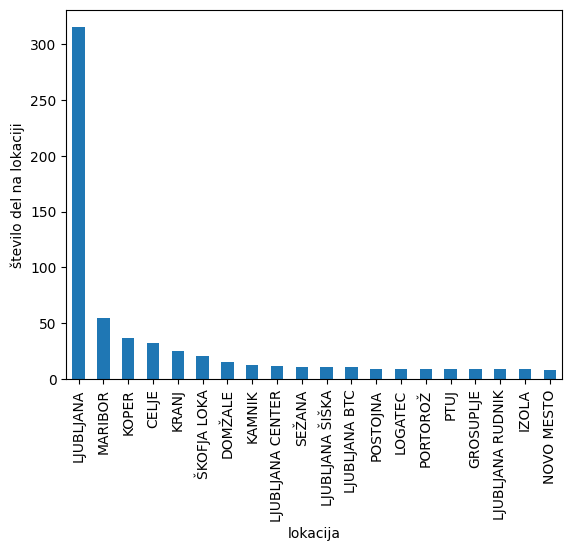

In [119]:
#izdelava grafa
prikaz_dela_po_lokacijah = dela_po_lokacijah.head(20).plot.bar() 
prikaz_dela_po_lokacijah.set_ylabel("število del na lokaciji")
plt.show()

Po pričakovanjih je daleč največ del razpisanih v največjem mestu, Ljubljani.

Zdaj preverimo na katerih lokacijah so dela v povprečju najbolje plačana. (Pri tem upoštevamo samo lokacije z več kot tremi oglasi)

In [120]:
štetje_lokacij = dela["lokacija"].value_counts()
naj_pogoste_lokacije = štetje_lokacij[štetje_lokacij > 3].index
dela_pogoste_lokacije = dela[dela["lokacija"].isin(naj_pogoste_lokacije)]

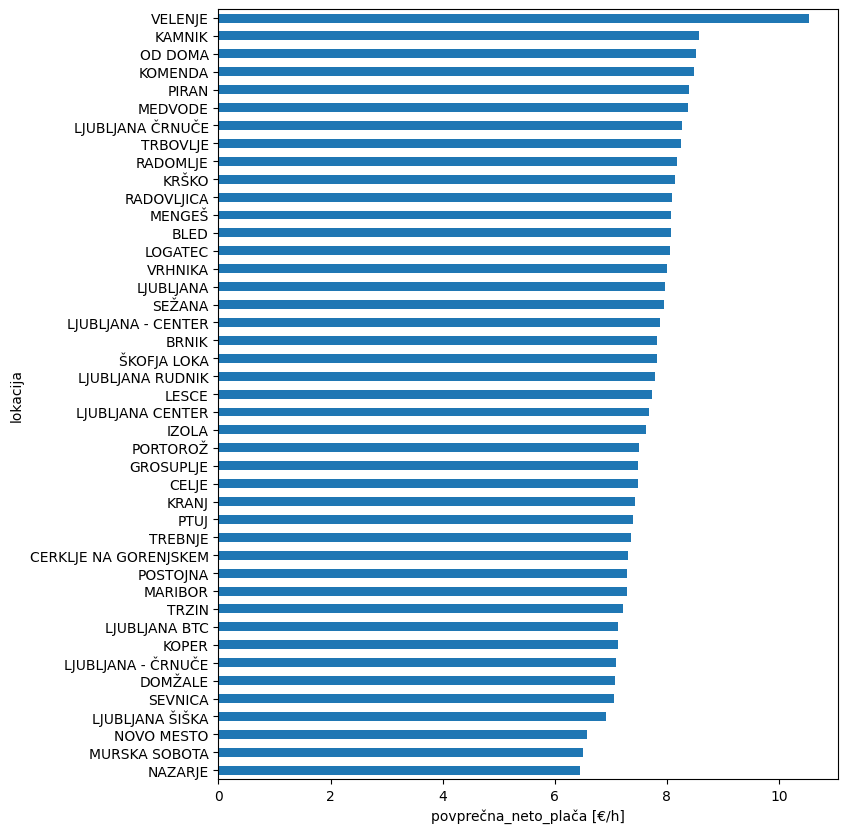

In [121]:
#izdelava grafa
plača_po_lokacijah = dela_pogoste_lokacije.groupby("lokacija")["plača_neto[€/h]"].mean().sort_values().plot(kind = "barh", figsize=(8, 10))
plača_po_lokacijah.set_xlabel("povprečna_neto_plača [€/h]")
plt.show()


Poglejmo če je ta ugotovitev primerljiva z najbolje plačanim delom na določeni lokaciji.

In [122]:
največja_plača = dela_pogoste_lokacije.groupby("lokacija")["plača_neto[€/h]"].max().sort_values(ascending = False)

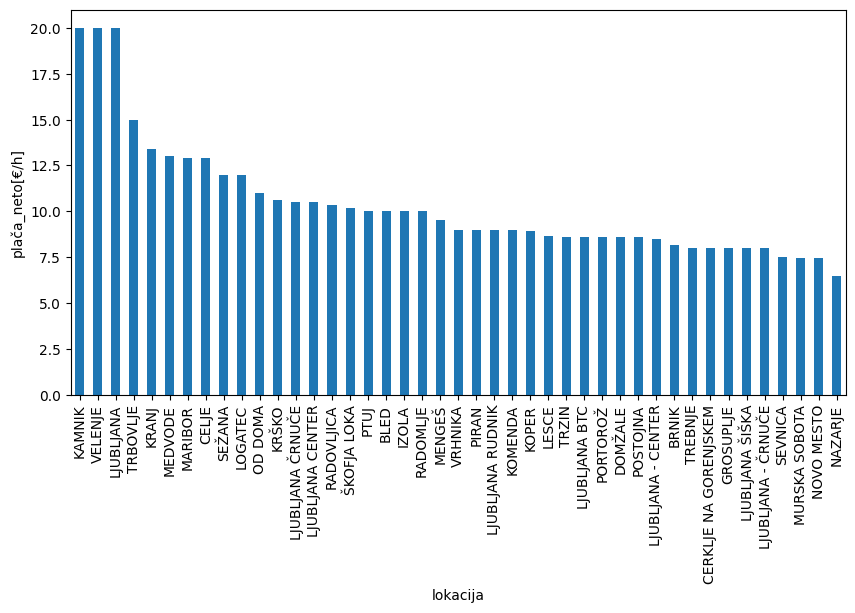

In [123]:
# izdelava grafa
največja_plača.plot(kind = "bar", figsize=(10, 5))
plt.ylabel("plača_neto[€/h]")
plt.show()

Vidimo, da ni nujno, da imajo kraji z najbolje plačanim delom tudi najboljše povprečje plač.

### Trenutno najbolj zaželen začetek dela

Zdaj poglejmo kateri je trenutno najbolj pogost čas za začetek dela.

In [124]:
dela['začetek_dela'] = pd.to_datetime(dela['začetek_dela'], format='%d. %m. %Y', errors='coerce') #pretvorba zapisa datumov

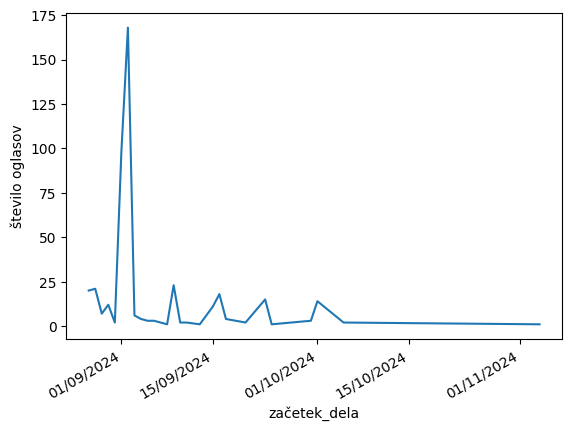

In [125]:
#izdelava grafa
dela_urejena_po_začetku = dela.sort_values(by = "začetek_dela").groupby("začetek_dela").size().sort_index().plot()
dela_urejena_po_začetku.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.ylabel("število oglasov")
plt.show()

Največ podjetji torej išče študenta, ki bi začel kmalu vendar ne takoj.

### Najbolj iskana področja dela in na katerih lokacijah so določena dela najbolj pogosta.

Oglejmo si katere so najbolj iskana področja dela in katero področje potrebujejo na katerih lokacijah.

In [126]:
naj_pogoste_lokacije = štetje_lokacij[štetje_lokacij > 3].sort_values(ascending = False).index
štetje_del = dela.groupby("delo").size()
naj_pogosta_dela = štetje_del[štetje_del > 3].sort_values(ascending = False).index

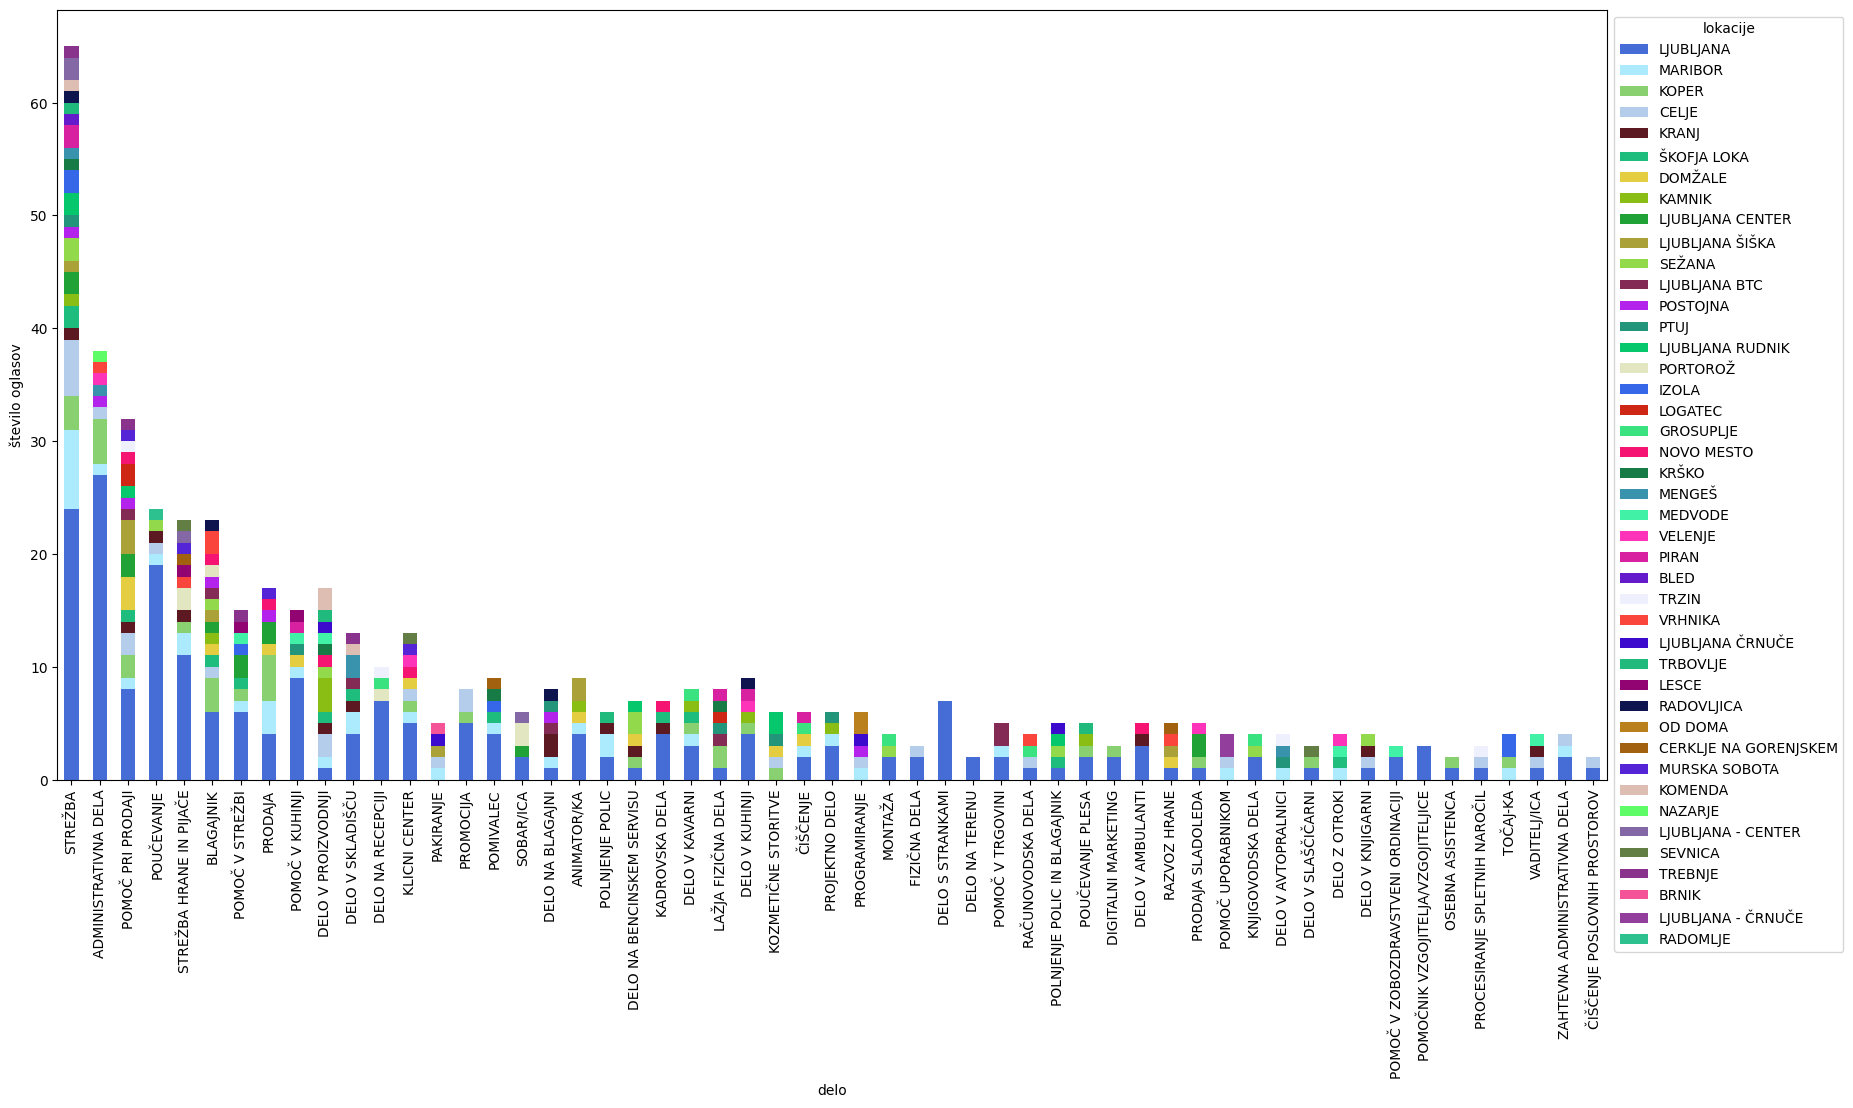

In [127]:
#ustvarjanje nove tabele
slovar_lokacij = {}
for lokacija in naj_pogoste_lokacije:
    slovar_lokacij[lokacija] = []
    for delo in naj_pogosta_dela:
        št = dela[(dela["delo"] == delo) & (dela["lokacija"] == lokacija)].shape[0]
        slovar_lokacij[lokacija].append(št)
tabela_lokacij_in_del = pd.DataFrame(slovar_lokacij, index = naj_pogosta_dela)
#ustvarjanje grafa
barve= ["#"+"".join([random.choice("0123456789ABCDEF") for _ in range(6)]) #uvoz novih barv, ker se ponavljajo
              for __ in range(len(tabela_lokacij_in_del.columns))]
tabela_lokacij_in_del.plot(kind="bar", stacked=True, figsize=(20, 10), color=barve)
plt.legend(title = "lokacije", bbox_to_anchor=(1.0, 1.0)) #premik legende, da ne prekriva grafa
plt.ylabel("število oglasov")
plt.show()

Največ študentov torej iščejo za delo v strežbi, prav tako ponovno vidimo prevladovanje del v Ljubljani.

### Najbolje plačana vrsta dela.

Preverimo katera vrsta dela je najbolje plačana.

In [128]:
dela_pogosta_dela = dela[dela["delo"].isin(naj_pogosta_dela)]

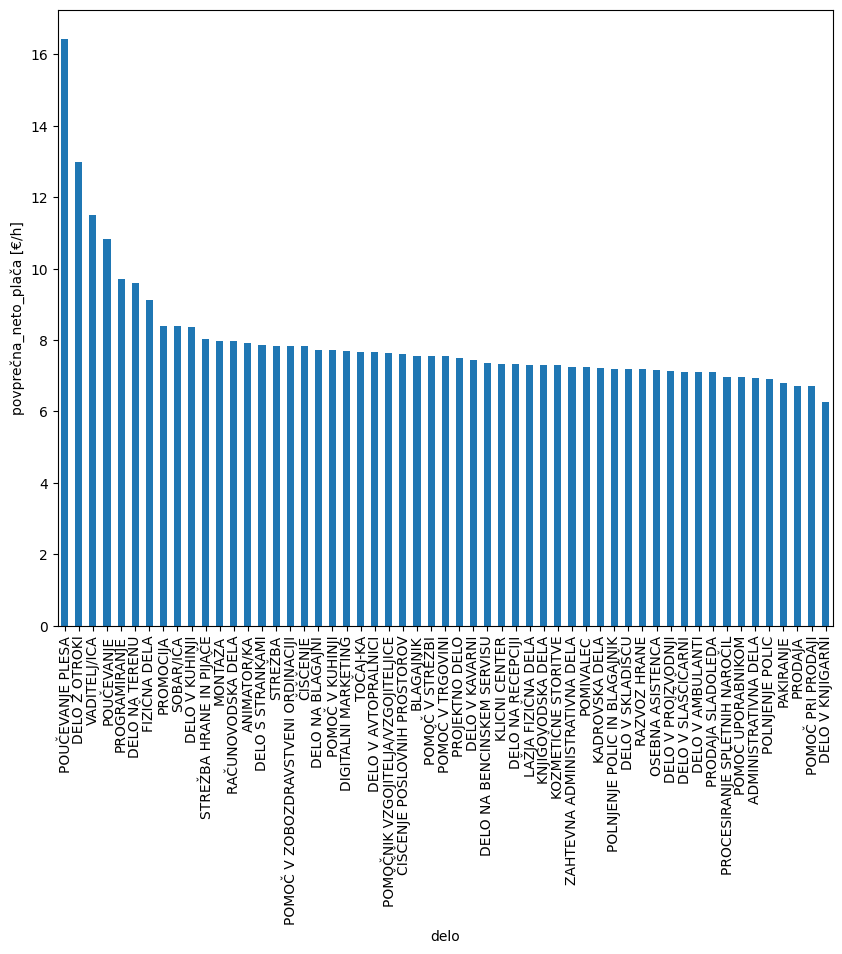

In [129]:
#izdelava grafa
dela_pogosta_dela.groupby("delo")["plača_neto[€/h]"].mean().sort_values(ascending = False).plot(kind = "bar", figsize=(10, 8))
plt.ylabel("povprečna_neto_plača [€/h]")
plt.show()

Najbolje so torej plačana dela povezana z otroki.

### Prosta mesta in plačilo

Oglejmo si kako je s prostimi mesti in plačo.

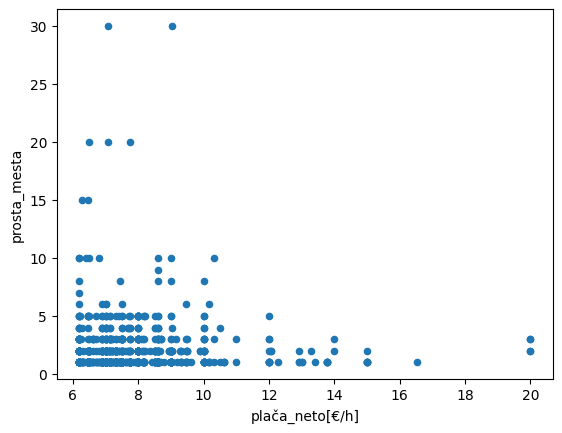

In [130]:
dela.plot.scatter(x = "plača_neto[€/h]", y = "prosta_mesta")
plt.show()

Vidimo, da je najbolj pogosta nizka plača in majhno število prostih mest.

## Zaključek

Ugotovili smo, da študentska dela v povprečju niso dobro plačana, bolje so plačana, če imaš izkušnje. Najbolje je plačano poučevanje, zanj je tudi veliko objavlenih oglasov. Iz analize je prav tako razvidno, da so oglasi za delo, glede na lokacijo, močno skoncentrirani na Ljubljano z okolico.